In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from graph import draw
import numpy as np
df = pd.read_pickle('../data/raw/swedish_stocks')
tickers = df.columns.get_level_values(0).unique()
df.columns.get_level_values(1).unique()
df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d")

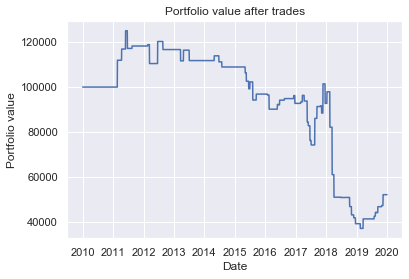

Evaluation of strategy
Gain: -47878.2 kr 
Avg gain: -772.2 kr/trade
    Total gain: 109707.3
    Total loss: -157585.5
Num trades: 62
    Num pos trades: 30
    Num neg trades: 32
Buy and hold would result in gain: nan
    Buy and hold vs gain: nan


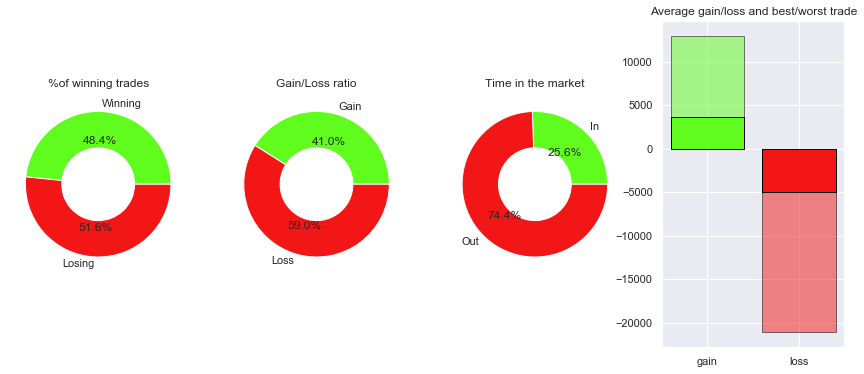

In [467]:
import datetime
import pandas as pd
import numpy as np
from imp import reload
import helpers
reload(helpers)
import helpers
import strats
reload(strats)
import strats
import glob

path = r'../data/clean/swe_equ' # use your path
allfiles = glob.glob(path + "/*.csv")

trade_df = helpers.create_trade_df()

for file_name in np.random.choice(allfiles, 10):
    data = pd.read_csv(file_name, parse_dates=['Date'], index_col=['Date'])
    signal_data = strats.data_momentum(data)
    
    trade_df = helpers.add_trades(trade_df, signal_data)
    signal_data = strats.data_mean_revert(data)
    
    trade_df = helpers.add_trades(trade_df, signal_data)
    
    
    
strats.plot_trades(trade_df.copy())
result = strats.evaluate_strat(trade_df)
strats.print_evaluation(result)


In [473]:
d = trade_df[np.logical_not(trade_df.signal.isna())]
d[d.signal != 0].tail(40)

,Close,signal
2017-11-10,17.98,1
2017-11-22,20.62,-1
2017-12-04,8.42,1
2017-12-18,7.7,-1
2017-12-28,78.53,1
2018-01-09,82.89,-1
2018-02-01,9.7,1
2018-02-13,8.14,-1
2018-02-28,7.86,1
2018-03-12,5.84,-1


C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalar

Evaluation of strategy
Gain: 1387.9 kr 
Avg gain: 277.6 kr/trade
    Total gain: 4027.1
    Total loss: -2639.2
Num trades: 5
    Num pos trades: 2
    Num neg trades: 3
Buy and hold would result in gain: 4165.6
    Buy and hold vs gain: 0.3331812944113693


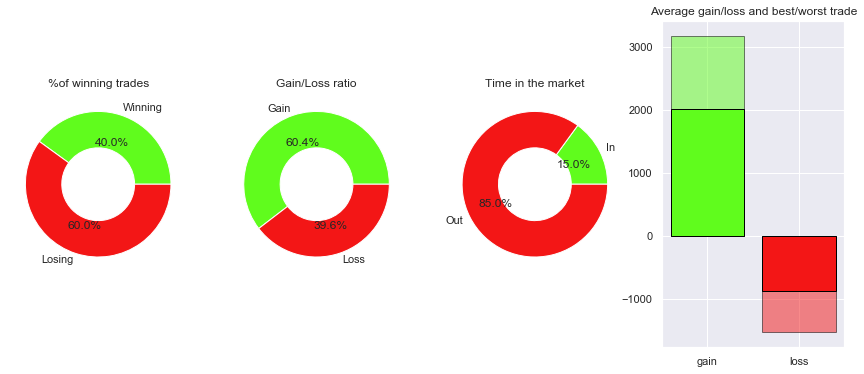

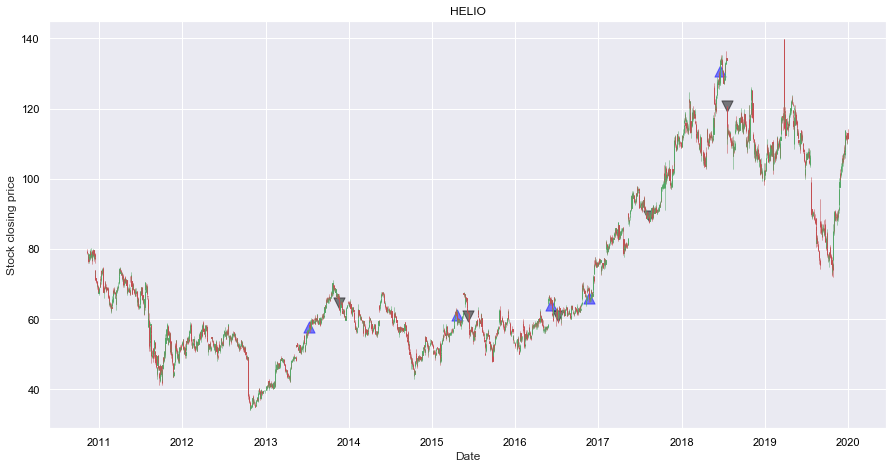

"\nnp.random.seed(912)\nres1 = []\nres2 = []\nres3 = []\nres4 = []\nres5 = []\nfor file_name in np.random.choice(allfiles, 75):\n    data = pd.read_csv(file_name, parse_dates=['Date'], index_col=['Date'])\n    data['ma20'] = talib.SMA(data.Close, timeperiod=20)\n    data['ma50'] = talib.SMA(data.Close, timeperiod=50)\n    data['ma200'] = talib.SMA(data.Close, timeperiod=200)\n    data['rsi3'] = talib.RSI(data.Close, timeperiod=3)\n    data['atr'] = talib.ATR(data.High, data.Low, data.Close)\n    _, _, data['bol_lower'] = talib.BBANDS(data.Close)\n    data['rsi'] = talib.RSI(data.Close, timeperiod=14)\n\n    roll_data = data.iloc[::-1]\n    data['signal'] = helpers.roll(roll_data, 20).apply(strats.momentum_strat)\n    data.dropna(inplace=True)\n    \n    result = strats.evaluate_strat(data)\n    \n    print(file_name[-10:], 'momentum_strat')\n    if result:\n        res1.append(result['result_buy_hold'])\n        res2.append(result['time_in_market'])\n        if result['num_trades']:\n 

In [398]:
import talib
from imp import reload
import helpers
reload(helpers)
import helpers
import strats
reload(strats)
import strats
import graph
reload(graph)
import graph
#import seaborn as sns; sns.set()
import glob
import pandas as pd
path = r'../data/clean/swe_equ' # use your path
allfiles = glob.glob(path + "/*.csv")





"""
data = pd.read_csv('../data/clean/swe_equ/MTG-B.csv', parse_dates=['Date'], index_col=['Date'])
data = strats.data_momentum(data)
result = strats.evaluate_strat(data)
strats.print_evaluation(result)
graph.draw(data, title='HELIO')
result




"""

res1 = []
res2 = []
res3 = []
res4 = []
res5 = []
for file_name in np.random.choice(allfiles, 75):
    data = pd.read_csv(file_name, parse_dates=['Date'], index_col=['Date'])
    data['ma20'] = talib.SMA(data.Close, timeperiod=20)
    data['ma50'] = talib.SMA(data.Close, timeperiod=50)
    data['ma200'] = talib.SMA(data.Close, timeperiod=200)
    data['rsi3'] = talib.RSI(data.Close, timeperiod=3)
    data['atr'] = talib.ATR(data.High, data.Low, data.Close)
    _, _, data['bol_lower'] = talib.BBANDS(data.Close)
    data['rsi'] = talib.RSI(data.Close, timeperiod=14)

    roll_data = data.iloc[::-1]
    data['signal'] = helpers.roll(roll_data, 20).apply(strats.momentum_strat)
    data.dropna(inplace=True)
    
    result = strats.evaluate_strat(data)
    
    print(file_name[-10:], 'momentum_strat')
    if result:
        res1.append(result['result_buy_hold'])
        res2.append(result['time_in_market'])
        if result['num_trades']:
            res3.append(result['num_pos_trades']/result['num_trades'])
        if result['total_gain']:
            res4.append(result['total_gain']/(abs(result['total_loss'])+result['total_gain']))
        res5.append(result['gain'])
        
        strats.print_evaluation(result)
        graph.draw(data, title=file_name[-10:])

print('buy and hold result :' + str(np.asarray(res1).mean()))
print('time: ' + str(np.asarray(res2).mean()))
print('pos trades: ' + str(np.asarray(res3).mean()))
print('gain: ' + str(np.asarray(res4).mean()))
print('mean gain: ' + str(np.asarray(res5).mean()))


In [233]:
data = pd.read_csv('../data/clean/swe_equ/omxs30.csv', sep=';', parse_dates=['Date'], index_col=['Date'])

data = data.apply(lambda x: x.str.replace(',','.'))
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Close = data.Close.astype(float)
data = data.drop(data[data.Close < 10].index)
data['Open'] = data.Close.shift(1)
data.dropna(inplace=True)
data.to_csv('../data/clean/OMXS30.csv')

In [452]:
import helpers
reload(helpers)
import helpers
import strats
reload(strats)
import strats
from numpy.lib.stride_tricks import as_strided as stride
w = 20
df=data#.iloc[::-1]
v = df.values
d0, d1 = v.shape
s0, s1 = v.strides
a = stride(v, (d0 - (w - 1), w, d1), (s0, s0, s1))
#helpers.roll(df, w).apply(strats.momentum_strat)
strats.data_momentum(df)

,Open,High,Low,Close,Volume,ma20,ma50,ma200,atr,rsi,signal
Date,,,,,,,,,,,


C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalar

1.0


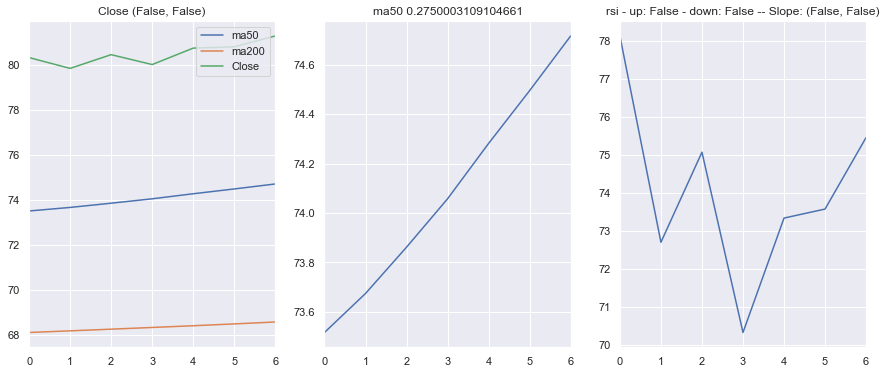

-1.0


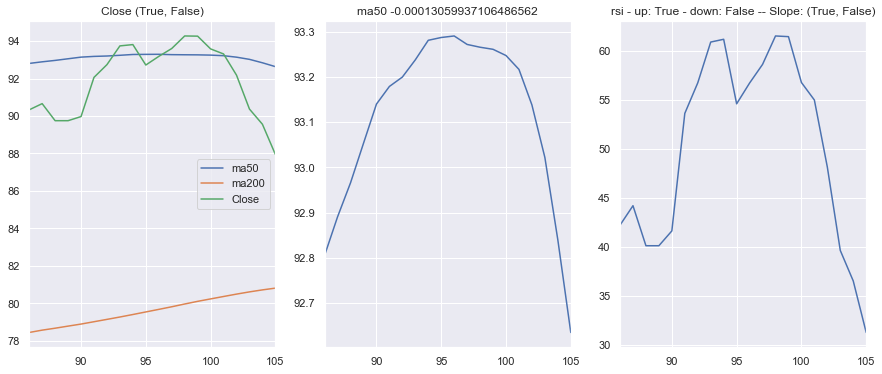

1.0


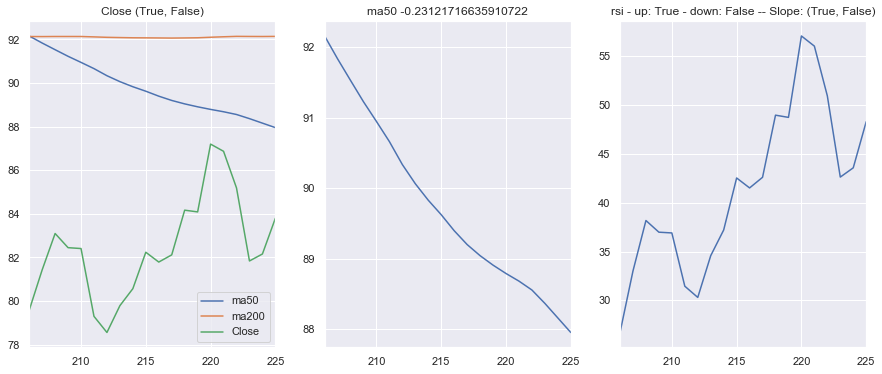

-1.0


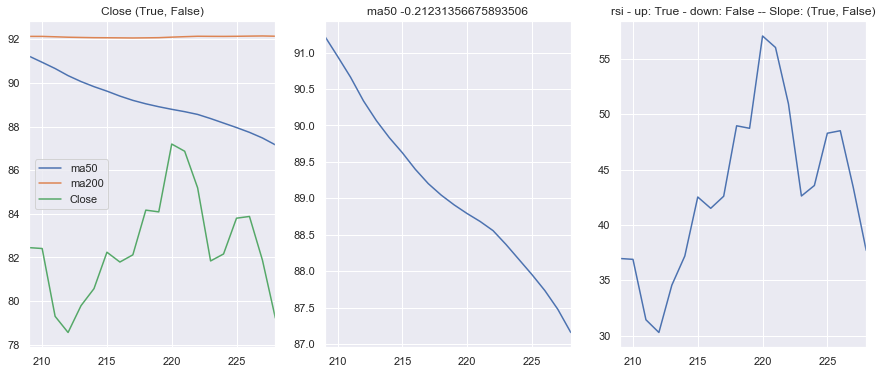

C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\agato\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalar

1.0


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\agato\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-136-d85c8377c93e>", line 45, in <module>
    plt.show()
  File "C:\Users\agato\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 269, in show
    return _show(*args, **kw)
  File "C:\Users\agato\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "C:\Users\agato\Anaconda3\lib\site-packages\IPython\core\display.py", line 306, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\agato\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<C:\Users\agato\Anaconda3\lib\site-packages\decorator.py:decorator-gen-9>", line 2, in __call__
  File "C:\Users\agato\Anacond

KeyboardInterrupt: 

In [136]:
"""
buy and hold result :0.7037333584734126
time: 0.06822561321088255
pos trades: 0.34623352165725046
gain: 0.6400944323653949

buy and hold result :0.5786866429997507
time: 0.056960157634874
pos trades: 0.3836477987421384
gain: 0.7164008660191196



buy and hold result :0.4371523210261126
time: 0.049797094542969954
pos trades: 0.3772686433063792
gain: 0.7422033305409389
mean gain: 1103.5520000000001

MA_DIFF = df['ma200'][0] * 0.06
    
MA20_STRENGTH = 0.26
MA50_STRENGTH = 0.2
MA200_STRENGTH = -0.1
ATR_STRENGTH = 0.3

STOP_LOSS_LEVEL = .925
"""

import talib
from imp import reload
import helpers
reload(helpers)
import helpers
import strats
reload(strats)
import strats
import graph
reload(graph)
import graph
#import seaborn as sns; sns.set()
import glob
import pandas as pd

import matplotlib.pyplot as plt
indices = data[data['signal'] != 0].index
rolling_len = 20
for i in indices:
    signal_data = data[(data.index <= i) & (data.index > i - rolling_len)]
    
    price_slope = helpers.calc_rsi_trend(signal_data.Close)
    ma50_slope = helpers.calc_slope(signal_data['ma50'])
    ma200_slope = helpers.calc_rsi_trend(signal_data['ma200'])
    
    rsi_slope = helpers.calc_rsi_trend(signal_data['rsi'])

    rsi_uptrend, rsi_downtrend = helpers.calc_rsi_trend(signal_data.rsi)
    
    plt.figure(figsize=(15,6))
    print(str(signal_data['signal'].values[-1]))
    plt.subplot(1,3,1)
    plt.title('Close ' + str(price_slope))
    signal_data['ma50'].plot()
    signal_data['ma200'].plot()
    signal_data['Close'].plot()
    plt.legend()
    plt.subplot(1,3,2)
    plt.title('ma50 ' + str(ma50_slope))
    signal_data['ma50'].plot()
    plt.subplot(1,3,3)
    #plt.title(max_slope, min_slope)
    plt.title('rsi - up: ' + str(rsi_uptrend) + ' - down: ' + str(rsi_downtrend) + ' -- Slope: ' + str(rsi_slope))
    signal_data['rsi'].plot()
    plt.show()

In [84]:
import strats
reload(strats)
import strats

roll_data1 = roll_data.iloc[:10,:]
helpers.roll(roll_data1, 5).apply(strats.momentum_strat)


(Timestamp('2019-12-19 00:00:00'), 0) (Timestamp('2019-12-19 00:00:00'), 4)
43.96 43.9
(Timestamp('2019-12-20 00:00:00'), 0) (Timestamp('2019-12-20 00:00:00'), 4)
46.5 44.2
(Timestamp('2019-12-23 00:00:00'), 0) (Timestamp('2019-12-23 00:00:00'), 4)
45.46 43.78
(Timestamp('2019-12-27 00:00:00'), 0) (Timestamp('2019-12-27 00:00:00'), 4)
45.0 43.8
(Timestamp('2019-12-30 00:00:00'), 0) (Timestamp('2019-12-30 00:00:00'), 4)
45.06 43.96
(Timestamp('2020-01-02 00:00:00'), 0) (Timestamp('2020-01-02 00:00:00'), 4)
45.46 46.5


""


In [122]:
data.head(5)
data[data.signal == 2]
data.tail(5)

,Date,Open,High,Low,Close,Volume,ma50,ma200,rsi3,bol_lower,rsi,signal
2282,737413.0,74.0,76.0,74.0,75.8,26521.0,71.644,74.39710,70.373345,71.813595,55.792977,0
2283,737416.0,75.9,78.4,75.4,77.0,29942.0,71.780,74.37370,79.030569,71.402501,58.963379,2
2284,737420.0,77.0,78.9,76.6,78.0,13876.0,71.932,74.36100,84.640742,71.322746,61.444848,0
2285,737423.0,78.3,81.3,78.3,81.0,17131.0,72.148,74.36615,93.030976,72.260165,67.746082,0
2286,737426.0,81.8,85.0,81.8,83.5,11226.0,72.410,74.38140,95.858753,73.440605,71.871710,0


In [39]:
equ = pd.read_csv('../data/clean/swe_equ/HM-B.csv', parse_dates=['Date'], index_col=['Date']).iloc[0:100,:]
from imp import reload
import strats
reload(strats)
from strats import pattern_strat
import helpers
from statsmodels.nonparametric.kernel_regression import KernelReg
reload(helpers)
import helpers
equ.index = np.linspace(1., len(equ), len(equ))
min_max = helpers.find_max_min(equ.Close)
kr = KernelReg([equ.Close.values], [equ.Close.index.values], var_type='c', bw=[1.8])
f = kr.fit([equ.index.values])
smooth_prices = pd.Series(data=f[0], index=equ.Close.index)
#c = nibe.Close.copy()
#c.index = np.linspace(1., len(c), len(c))
#print(c.values.shape, c.index.values.shape)
plt.figure(figsize=(15,6))
plt.plot(equ.Close)
plt.plot(smooth_prices)
plt.scatter(x=min_max.index, y=min_max.values)
plt.scatter(x=[21,38, 518,540], y=[5,5,5,5])
pattern_strat(min_max)
print(min_max)

NameError: name 'np' is not defined

In [9]:
import trendln
# this will serve as an example for security or index closing prices, or low and high prices
import yfinance as yf # requires yfinance - pip install yfinance
tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
h = hist[-100:].Close
mins, maxs = trendln.calc_support_resistance(h)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None)) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High))
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

In [265]:
equ = pd.read_csv('../data/clean/swe_equ/TELIA.csv', parse_dates=['Date'], index_col=['Date'])#.iloc[0:100,:]

nan -0.03589430894308913 nan


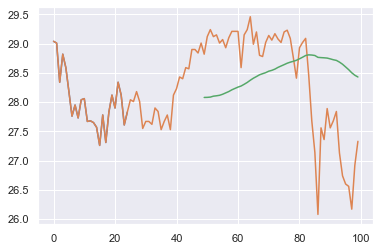

0.1404261335224432 -0.03589430894308913 27.729974415841593


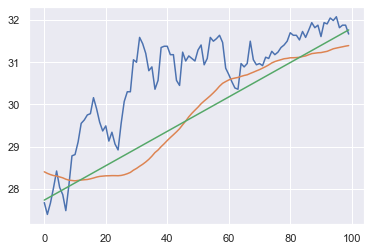

-0.02088365034850676 -0.03589430894308913 32.03261829702973


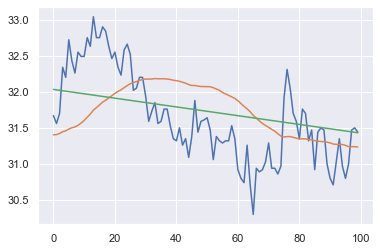

-0.10279580437382489 -0.03589430894308913 31.75773912871287


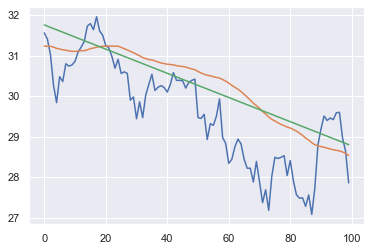

-0.01502487438826552 -0.03589430894308913 27.802663564356447


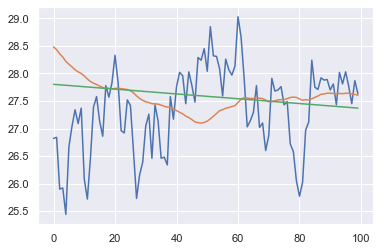

0.051585968514206236 -0.03589430894308913 27.499006019801993


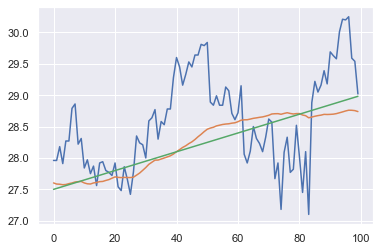

0.06199384814514482 -0.03589430894308913 28.334292831683182


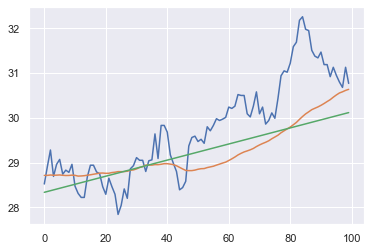

-0.059896820260539205 -0.03589430894308913 30.498038811881216


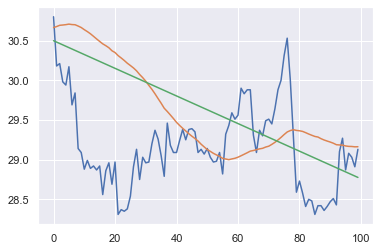

0.08845539512628924 -0.03589430894308913 28.992525386138638


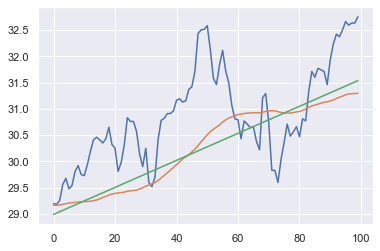

0.19617415047289824 -0.03589430894308913 30.907549821782197


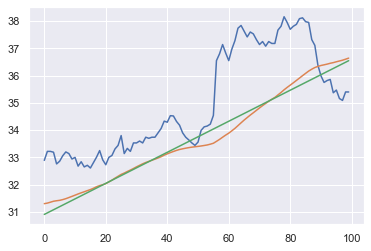

In [310]:
equ1 = equ.iloc[:25,:]
from scipy.stats import linregress
plt.plot(np.arange(len(equ1.Close)), equ1.Close.values)
mins, maxs = trendln.calc_support_resistance(equ1.Close)
#plt.plot(np.arange(len(equ1.Close)), mins[1][1] + mins[1][0] * np.arange(len(equ1.Close)))
equ['ma50'] = talib.SMA(equ.Close, timeperiod=50)
for i in range(10):
    equ1 = equ.iloc[100*i:(i+1)*100,:]
    plt.plot(np.arange(len(equ1.Close)), equ1.Close.values)
    plt.plot(np.arange(len(equ1.Close)), equ1.ma50.values)
    ma50_slope, intersept, _, _, _ = linregress(np.arange(len(equ1.Close)), equ1.ma50.values)
    plt.plot(np.arange(len(equ1.Close)), intersept + ma50_slope * np.arange(len(equ1.Close)))
    print(ma50_slope/equ.Close[0]*100, mins[1][0], intersept)

    
    plt.show()

no no 6.001008762811859 4.61878590352849


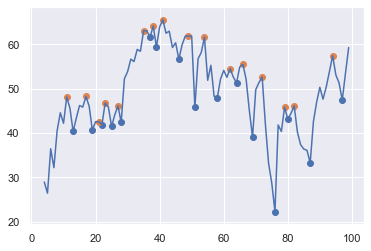

no no -7.946654893025697 2.8748860093020467


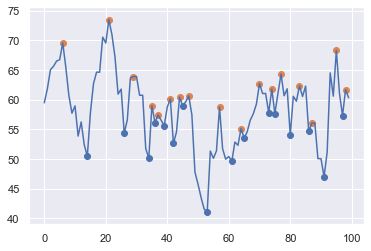

no short -16.426386065183078 -18.48407600843979


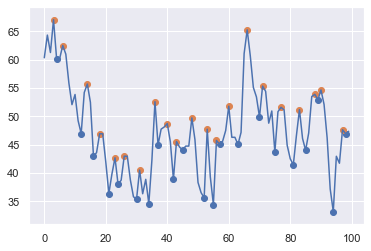

no short -12.004021694241699 -20.615937215220544


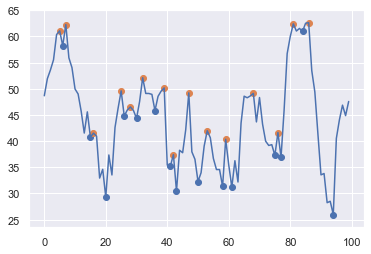

no no 3.7609460373488397 11.55001675234766


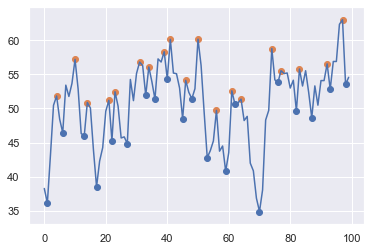

no no 4.557983086468598 1.7767373980127166


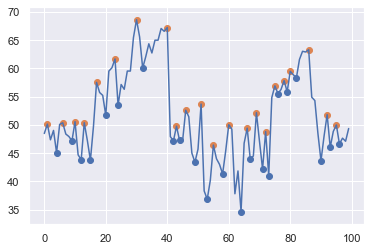

no no 7.804993178538216 7.704883580579571


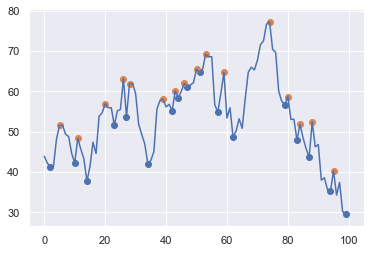

long no 20.795355428255426 14.890578388848871


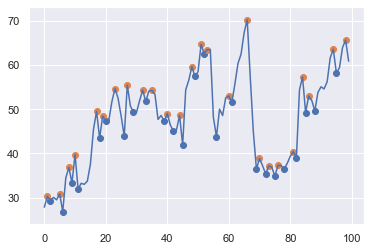

no short -9.348786987536 -17.502784961148958


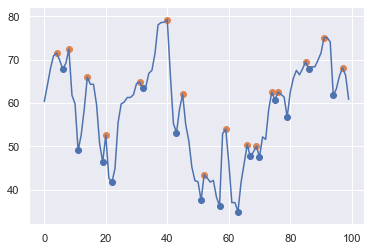

no no 3.150129511517572 2.3152777745194184


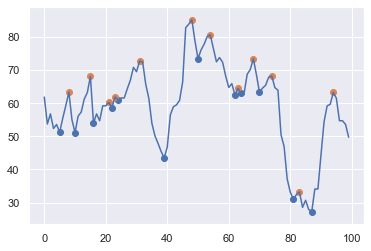

In [311]:
for i in range(10):
    equ1 = equ.iloc[10+100*i:10+(i+1)*100,:]
    minimaIdxs, maximaIdxs = trendln.get_extrema(equ1.rsi)
    plt.plot(np.arange(len(equ1.rsi)),equ1['rsi'])
    min_values = equ1.rsi[minimaIdxs]
    max_values = equ1.rsi[maximaIdxs]
    plt.scatter(minimaIdxs, min_values)
    plt.scatter(maximaIdxs, max_values)
    mins = (np.asarray(min_values[1:]) - min_values[0]).mean()
    maxs = (np.asarray(max_values[1:]) - max_values[0]).mean()
    res1 = 'long' if mins > 15 or maxs > 15 else 'no'
    res2 = 'short' if mins < -15 or maxs < -15 else 'no'
    print(res1, res2, maxs, mins)
    plt.show()

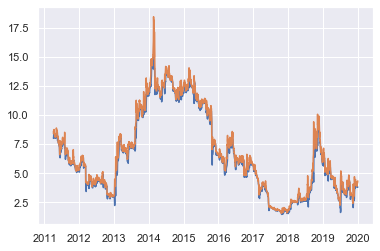

In [175]:
plt.plot(data['bol_lower'])

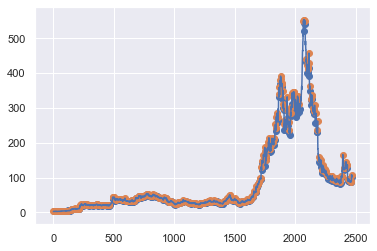

In [149]:
equ1 = equ.iloc[:,:]
minimaIdxs, maximaIdxs = trendln.get_extrema(equ1.Close)
equ1.Close[minimaIdxs]
plt.plot(range(len(equ1.Close)), equ1.Close)
plt.scatter(minimaIdxs, equ1.Close[minimaIdxs])
plt.scatter(maximaIdxs, equ1.Close[maximaIdxs])

In [136]:
movement = equ1.Close.max() - equ1.Close.min()
min_result = 0
for i in range(0,equ1.Close[minimaIdxs].shape[0]-1):
    diff = -(equ1.Close[minimaIdxs][i] - equ1.Close[minimaIdxs][i+1])
    min_result += diff
max_result = 0
for i in range(0,equ1.Close[maximaIdxs].shape[0]-1):
    diff = -(equ1.Close[maximaIdxs][i] - equ1.Close[maximaIdxs][i+1])
    max_result += diff
print(max_result/movement, min_result/movement)

0.56478611283323 0.41971481711097336


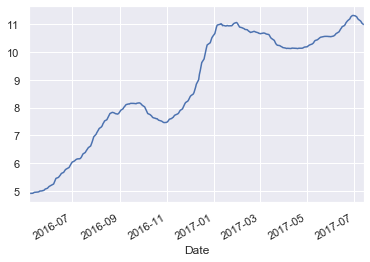

In [163]:
ma = data.ma20.dropna()
ma = ma.iloc[-500:-200]
ma.plot()

In [164]:
import helpers
reload(helpers)
import helpers
helpers.calc_slope(ma)

0.43055768562364194